<a href="https://colab.research.google.com/github/jumbokh/csu1101-ML-Class/blob/main/notebooks/Check_BP_GradientVanish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 博碩 MP22004 Ch5

In [1]:
import tensorflow as tf

### 宣告輸入、權重和預測輸出

In [3]:
x=0.4
w1, w2=tf.Variable(1.0),tf.Variable(1.0)
y=1

### 正向傳遞會被記錄到 "tape"中

In [4]:
with tf.GradientTape() as tape:
  # 正向傳遞的計算
  h1 = x * w1
  h2 = tf.sigmoid(h1)
  h3 = h2 * w2
  y_hat = tf.sigmoid(h3)
  loss = (y - y_hat)**2

### 反向傳遞"tape"計算權重w1梯度

In [5]:
gradients = tape.gradient(loss, w1)
print(gradients)

tf.Tensor(-0.01560118, shape=(), dtype=float32)


## 改善梯度消失, 權重初始化

In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers

### 標準差為1的常態分佈和 Sigmoid 激活函數的網路模型

In [7]:
inputs = keras.Input(shape=(100,))
x1 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 1))(inputs)
x2 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 1))(x1)
x3 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 1))(x2)
x4 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 1))(x3)
x5 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 1))(x4)
model_1 = keras.Model(inputs, [x1, x2, x3, x4, x5])

### 顯示每層網路的輸出分布

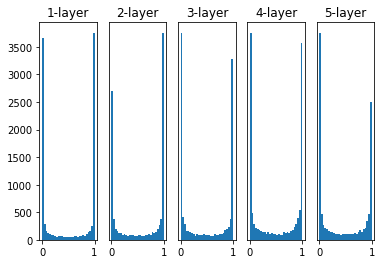

In [8]:
x = np.random.randn(100, 100)
outputs = model_1.predict(x)
for i, layer_output in enumerate(outputs):
    plt.subplot(1, 5, i+1)  # 選擇顯示在表中的哪個格子裡
    plt.title(str(i+1) + "-layer")  # 設定值方圖的標題
    if i != 0: plt.yticks([], [])  # 只顯示第一列值方圖的y軸
    plt.hist(layer_output.flatten(), 30, range=[0,1])  # 畫出值方圖
plt.show()

### 標準差為0.05的常態分佈和 Sigmoid 激活函數的網路模型

In [9]:
inputs = keras.Input(shape=(100,))
x1 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 0.01))(inputs)
x2 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 0.01))(x1)
x3 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 0.01))(x2)
x4 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 0.01))(x3)
x5 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 0.01))(x4)
model_2 = keras.Model(inputs, [x1, x2, x3, x4, x5])

### 顯示每層網路的輸出分布

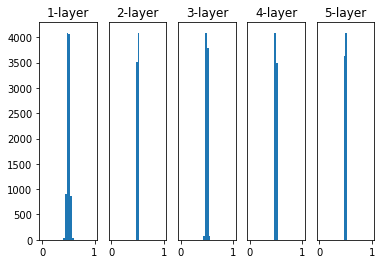

In [10]:
x = np.random.randn(100, 100)
outputs = model_2.predict(x)
for i, layer_output in enumerate(outputs):
    plt.subplot(1, 5, i+1)  # 選擇顯示在表中的哪個格子裡
    plt.title(str(i+1) + "-layer")  # 設定值方圖的標題
    if i != 0: plt.yticks([], [])  # 只顯示第一列值方圖的y軸
    plt.hist(layer_output.flatten(), 30, range=[0,1])  # 畫出值方圖
plt.show()